<a href="https://colab.research.google.com/github/FaiyKhalid/3D-/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data.shape

(5110, 12)

In [5]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.isnull().values.any()

True

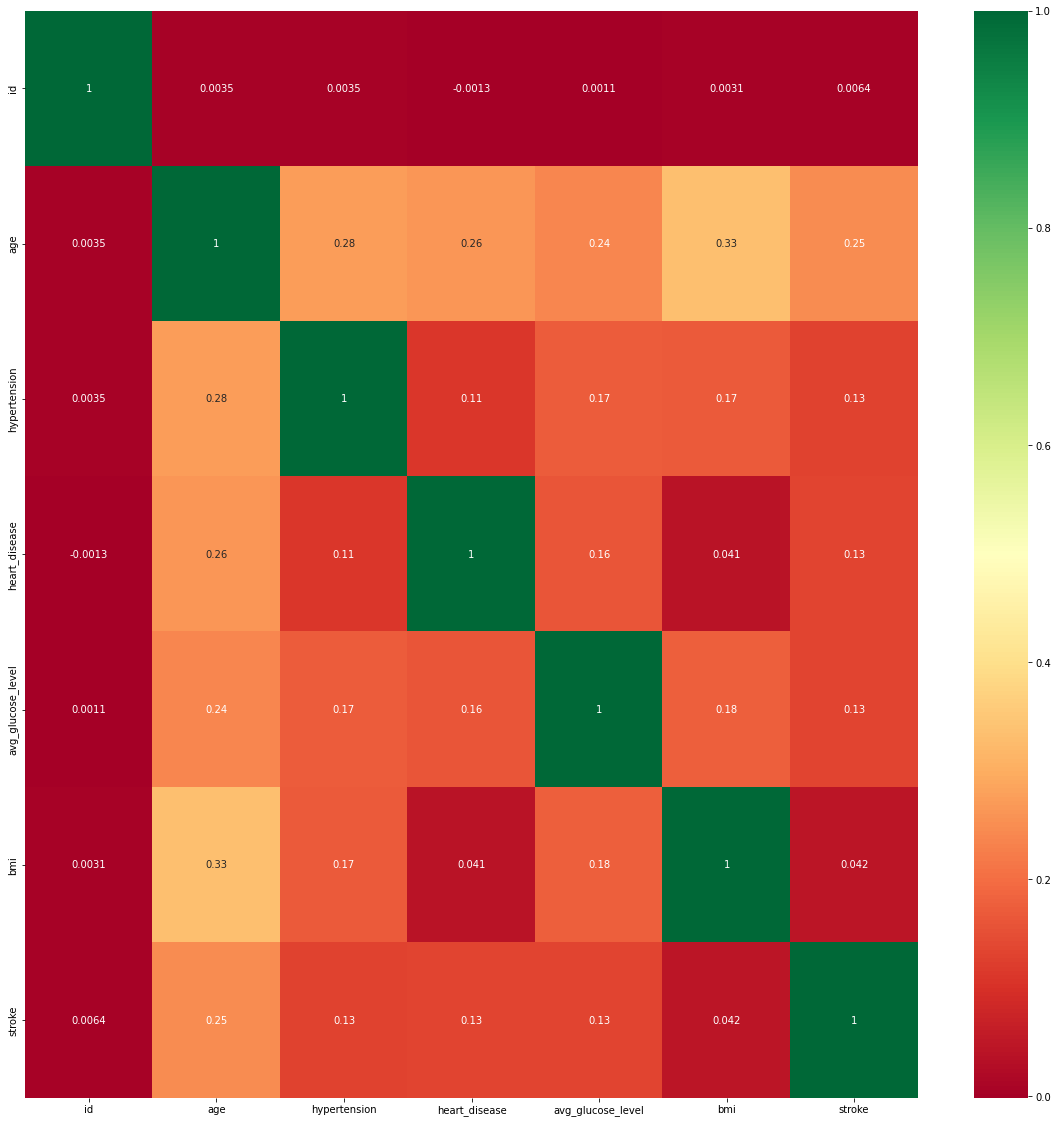

In [7]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [10]:
stroke_true_count = len(data.loc[data['stroke'] == True])
stroke_false_count = len(data.loc[data['stroke'] == False])

In [11]:
(stroke_true_count,stroke_false_count)

(249, 4861)

In [12]:
from sklearn.model_selection import train_test_split
feature_columns = ['id', 'gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status']
predicted_class = ['stroke']

In [13]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [14]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing hypertension: {0}".format(len(data.loc[data['hypertension'] == 0])))
print("number of rows missing heart_disease: {0}".format(len(data.loc[data['heart_disease'] == 0])))
print("number of rows missing avg_glucose_level: {0}".format(len(data.loc[data['avg_glucose_level'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))


total number of rows : 5110
number of rows missing hypertension: 4612
number of rows missing heart_disease: 4834
number of rows missing avg_glucose_level: 0
number of rows missing bmi: 0


In [25]:
from sklearn.impute import SimpleImputer

In [40]:
numeric_cols = columns_to_use = ['id', 'gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status']

In [41]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', usecols= numeric_cols)

In [42]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [43]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown


In [46]:
data.isnull().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
dtype: float64

In [47]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

In [64]:
imputer.fit(data)

ValueError: ignored